#6IA - Modelos de Machine Learning

##Aula 6 - Regressao Logistica

In [8]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving weights.csv to weights (1).csv
Arquivo "weights.csv" importado pelo usuário com tamanho de 2022 bytes


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

In [0]:
pesos = pd.read_csv('weights.csv', sep=';')

In [16]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


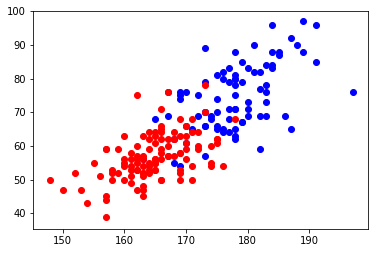

In [17]:
pesos = pesos[pesos.weight <= 100].reset_index(drop=True)
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

In [18]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

,sex,weight,height,M
0,M,77,182,1
1,F,58,161,0
2,F,53,161,0
3,M,68,177,1
4,F,59,157,0


In [0]:
x = pesos[['weight', 'height']]
y = pesos.M

In [20]:
reg_log = LogisticRegression()
reg_log.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
arvore = DecisionTreeClassifier()
arvore.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
reg_log.coef_

array([[ 0.21993397, -0.07531506]])

In [26]:
reg_log.intercept_

array([-1.55761751])

In [0]:
# Plotando a linha da Regressao Logistica
heights = np.linspace(140, 210, 70)
coef_weight = float(reg_log.coef_[0][0])
coef_height = float(reg_log.coef_[0][1])
intercept = float(reg_log.intercept_)

reta_decisao = (-heights*coef_height - intercept)/coef_weight

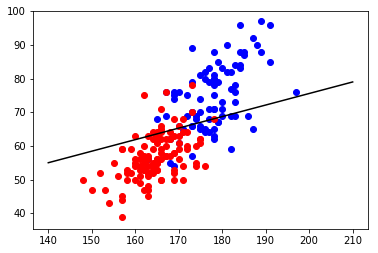

In [29]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], y=pesos.loc[pesos.sex=='F', 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

In [30]:
classified_reg = reg_log.predict(x)
classified_reg

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

In [31]:
classified_arv = arvore.predict(x)
classified_arv

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

In [32]:
classified_arv == classified_reg

array([ True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,

In [0]:
pesos_classified_reg = pd.concat([pesos, pd.DataFrame(classified_reg, columns=['classificado_reg'])], axis=1)
pesos_classified_arv = pd.concat([pesos, pd.DataFrame(classified_arv, columns=['classificado_arv'])], axis=1)

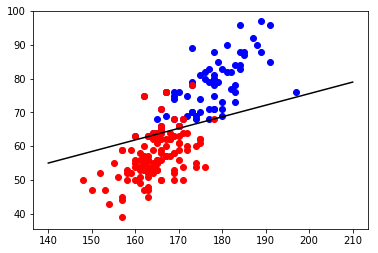

In [35]:
plt.scatter(x=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==1.0, 'height'], y=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==1.0, 'weight'], c='blue')
plt.scatter(x=pesos_classified_arv.loc[pesos_classified_arv.classificado_arv==0.0, 'height'], y=pesos_classified_arv.loc[pesos_classified_arv.classificado_arv==0.0, 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')

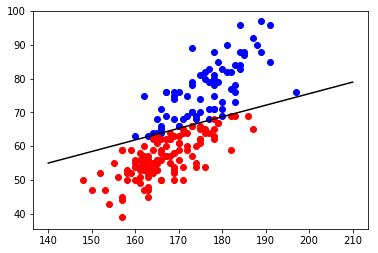

In [36]:
# Regressao
plt.scatter(x=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==1.0, 'height'], y=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==1.0, 'weight'], c='blue')
plt.scatter(x=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==0.0, 'height'], y=pesos_classified_reg.loc[pesos_classified_reg.classificado_reg==0.0, 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

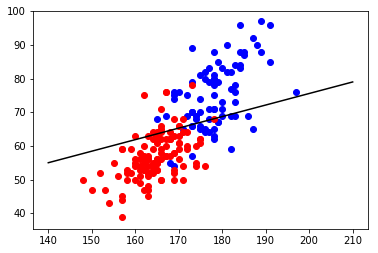

In [37]:
# Arvore
plt.scatter(x=pesos_classified_arv.loc[pesos_classified_arv.classificado_arv==1.0, 'height'], y=pesos_classified_arv.loc[pesos_classified_arv.classificado_arv==1.0, 'weight'], c='blue')
plt.scatter(x=pesos_classified_arv.loc[pesos_classified_arv.classificado_arv==0.0, 'height'], y=pesos_classified_arv.loc[pesos_classified_arv.classificado_arv==0.0, 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

In [39]:
# Teste dos modelos
novo_exemplo = [[90.00, 176]]

reg_log.predict_proba(novo_exemplo)

array([[0.00682043, 0.99317957]])

In [0]:
# Visualizacao 3D
from mpl_toolkits.mplot3d import Axes3D

weights = x['weight']
heights = x['height']

probs = pd.DataFrame(reg_log.predict_proba(x)[:,1], columns=['probs'])

In [41]:
pesos_classificados = pd.concat([x, probs], axis=1)

pesos_classificados.head()

,weight,height,probs
0,77,182,0.841570
1,58,161,0.283499
2,53,161,0.116413
3,68,177,0.516775
4,59,157,0.399877


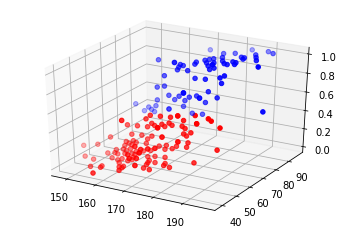

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'height'], 
           ys=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'weight'],
           zs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'probs'],
           c='blue', marker='o')

ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'height'], 
           ys=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'weight'],
           zs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'probs'],
           c='red', marker='o')

# Rotacao
ax.azim = 300

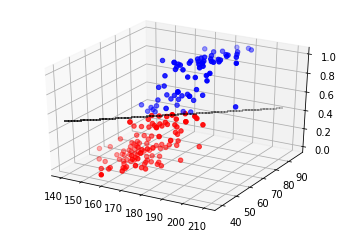

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'height'], 
           ys=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'weight'],
           zs=pesos_classificados.loc[pesos_classificados.probs >= 0.5, 'probs'],
           c='blue', marker='o')

ax.scatter(xs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'height'], 
           ys=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'weight'],
           zs=pesos_classificados.loc[pesos_classificados.probs < 0.5, 'probs'],
           c='red', marker='o')

ax.scatter(xs=np.linspace(140,210,70),
           ys=np.linspace(40, 90, 70),
           zs=np.ones(70)*0.5, marker='_', c='black')
# Rotacao
ax.azim = 300